# Typology of AI Governance Models via PCA and Clustering

In [19]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data construction

In [11]:
data = {
    'Country': ['EU', 'USA', 'China'],
    'Centralization': [3, 1, 5],
    'Transparency': [5, 2, 1],
    'Accountability': [5, 2, 2],
    'Innovation': [3, 5, 4],
    'RiskMgmt': [5, 3, 3],
    'Stakeholder': [5, 2, 1],
    'TechCapacity': [3, 4, 5]
}

df = pd.DataFrame(data)

## 2. Preprocessing: Standardization

In [4]:
X = df.drop(columns=['Country'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Perform PCA (2D)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## 4. Print eigenvalues & variance explained

In [21]:
print("Eigenvalues:", pca.explained_variance_)
print("Variance explained ratio:", pca.explained_variance_ratio_)
print("Cumulative variance explained:", pca.explained_variance_ratio_.cumsum())

Eigenvalues: [8.16217603 2.33782397]
Variance explained ratio: [0.7773501 0.2226499]
Cumulative variance explained: [0.7773501 1.       ]


## 5. Calculate raw & scaled loadings

In [23]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=['PC1', 'PC2']
)
eigs = np.sqrt(pca.explained_variance_)
loadings_scaled = loadings.multiply(eigs, axis=1)

print("\nRaw loadings:\n", loadings.round(3))
print("\nScaled loadings:\n", loadings_scaled.round(3))


Raw loadings:
                   PC1    PC2
Centralization -0.052  0.795
Transparency    0.426 -0.097
Accountability  0.426  0.097
Innovation     -0.343 -0.481
RiskMgmt        0.426  0.097
Stakeholder     0.426 -0.097
TechCapacity   -0.394  0.314

Scaled loadings:
                   PC1    PC2
Centralization -0.148  1.216
Transparency    1.216 -0.148
Accountability  1.216  0.148
Innovation     -0.979 -0.736
RiskMgmt        1.216  0.148
Stakeholder     1.216 -0.148
TechCapacity   -1.127  0.480


## 6. KMeans clustering on PCA scores

In [24]:
os.environ["OMP_NUM_THREADS"] = "1"
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca)

C:\Users\yhj59\miniconda3\envs\sophie\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 5. Consolidate results

In [13]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
df_pca['Country'] = df['Country']

## 7. Build final DataFrame for plotting

In [25]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
df_pca['Country'] = df['Country']

## 8. Scatter plot with meaningful axis labels

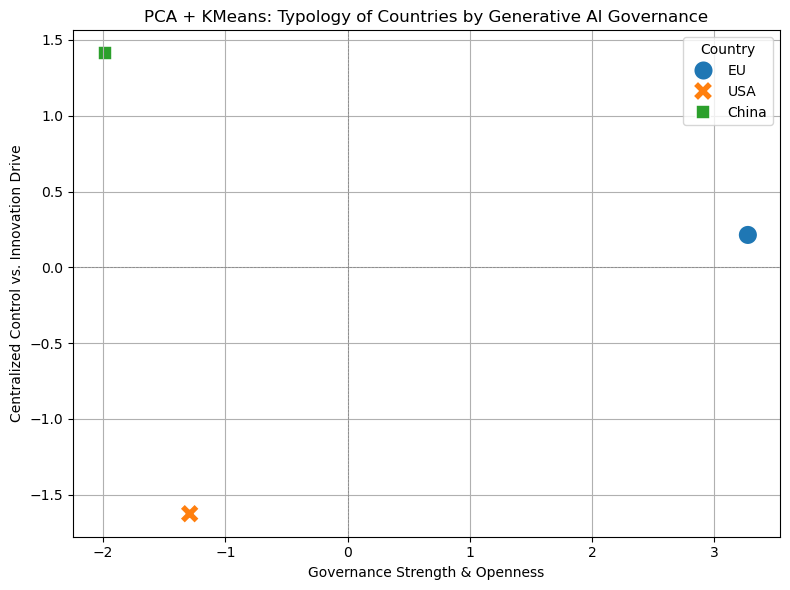

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='Country',
    style='Country',
    s=200
)
plt.title('PCA + KMeans: Typology of Countries by Generative AI Governance')
plt.xlabel('Governance Strength & Openness')
plt.ylabel('Centralized Control vs. Innovation Drive')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()